In [82]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

In [83]:
train = pd.read_csv('data/big_Train.csv')

test = pd.read_csv('data/big_Test.csv')

In [160]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.066132,182.0950,1998,732.3800
4,8.93,0.066132,53.8614,1987,994.7052


In [85]:
# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [86]:
# splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [87]:
# training the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# predicting on cv

pred = lreg.predict(x_cv)

In [90]:
# calculating mse

mse = np.mean((pred - y_cv)**2)

In [91]:
mse

1993449.1762073324

In [92]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

In [93]:
coeff['Coefficient Estimate'] = Series(lreg.coef_)

In [94]:
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-7.930234
1,Item_MRP,15.382548


In [95]:
# y = -10.663196x1+15.700588x2
# x1 = Outlet_Establishment_Year
# x2 = Item_MRP

In [96]:
# R-square
lreg.score(x_cv, y_cv)

0.33802572487823218

## Linear regression with more variables

In [117]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

In [118]:
# splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [119]:
# training the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
# solve nan problems
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [121]:
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [122]:
# training the model 
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
# predicting on cv 
pred = lreg.predict(x_cv)

In [124]:
# calculating mse
mse = np.mean((pred - y_cv)**2)

In [125]:
mse

1871778.3400751757

In [126]:
# calculating coefficients

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)

In [127]:
print(coeff)

                           0  Coefficient Estimate
0  Outlet_Establishment_Year             -9.050710
1                   Item_MRP             15.421617
2                Item_Weight              0.759244


In [128]:
# y = -11.976692x1 + 15.511983x2 -4.013799x3

In [129]:
# calculating r-square
lreg.score(x_cv,y_cv)

0.34408598523695644

## Using all the features for prediction

### Data pre-processing steps for regression model

In [156]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [157]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

In [137]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [140]:
mylist = list(train.select_dtypes(include=['object']).columns)

In [142]:
dummies = pd.get_dummies(train[mylist], prefix= mylist)

In [144]:
train.drop(mylist, axis=1, inplace = True)

In [145]:
X = pd.concat([train,dummies], axis =1 )

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
lreg = LinearRegression()

In [149]:
X = train.drop('Item_Outlet_Sales',1)

In [150]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [151]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
pred_cv = lreg.predict(x_cv)

In [153]:
mse = np.mean((pred_cv - y_cv)**2)

In [154]:
mse

1974206.0527863773

In [155]:
lreg.score(x_cv,y_cv)

0.33035977335984124

## Interpretation of Regression Plots

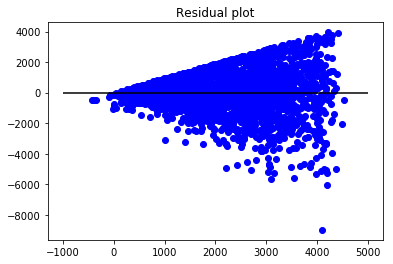

In [161]:
#residual plot

x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

The presence of non-constant variance in the error terms results in heteroskedasticity. 

## Regularization
In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. 

### the coefficients of feature

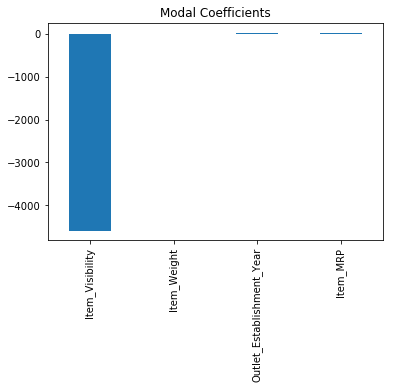

In [162]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')